In [83]:
import data_loader
import torch
from torch_geometric.data import Data
import networkx as nx
import network

In [84]:
example_network = network.Network.from_data_file('network_data/1/compression_sim/network.lmp')

Atoms expected: 38
Atoms read: 38
Bonds expected: 68
Bonds read: 68
No angle data have been found
Calculating angles..
Angles calculated: 189
No dihedrals data have been found
Dihedrals are not yet emplemented.
Found mass info: 
    Atom type: 1, mass: 10000.0 units


In [85]:
data_0 = data_loader.parse_dump(
    'network_data/1/compression_sim/dump.lammpstrj',
    example_network,
    'full'
)[0]
data_0

Data(x=[38, 4], edge_index=[2, 68], edge_attr=[1, 68])

In [86]:
G = nx.Graph()
for index, node in enumerate(data_0.x):
    G.add_node(index, pos=(node[0], node[1]))
edges = data_0.edge_index.t().tolist()
G.add_edges_from(edges)

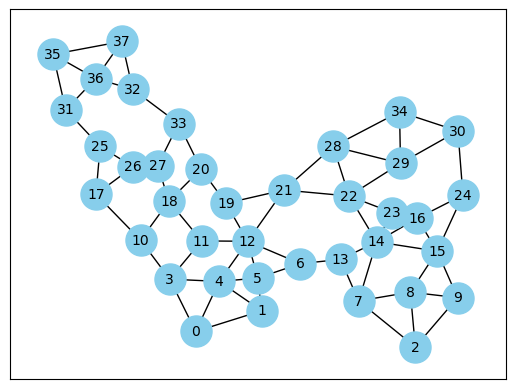

In [87]:
pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
